In [1]:
%pylab inline
from pyiga import bspline, geometry, vis

Populating the interactive namespace from numpy and matplotlib


# Geometry manipulation in `pyiga`

We can define line segments or circular arcs using the builtin functions
from the `geometry` module
(see [its documentation](https://pyiga.readthedocs.io/en/latest/api/geometry.html)
for details on all the functions used here).
All kinds of geometries can be conveniently plotted using the `vis.plot_geo()` function.

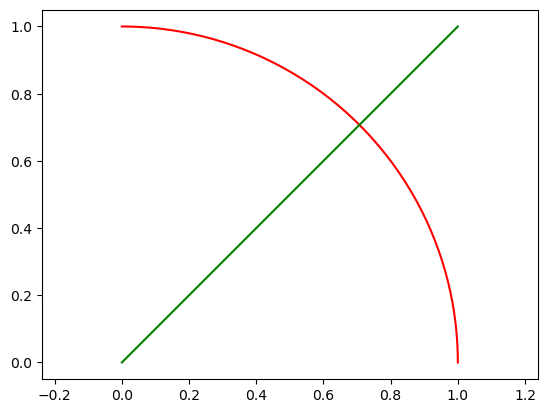

In [2]:
f = geometry.circular_arc(pi/2)
g = geometry.line_segment([0,0], [1,1])

vis.plot_geo(f, color='red')
vis.plot_geo(g, color='green')
axis('equal');

Geometries can be translated, rotated or scaled:

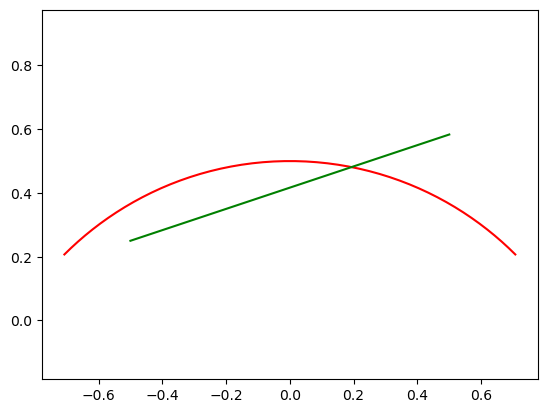

In [3]:
vis.plot_geo(f.rotate_2d(pi/4).translate([0,-0.5]), color='red')
vis.plot_geo(g.scale([1,1/3]).translate([-.5,.25]), color='green')
axis('equal');

We can combine the univariate geometry functions $f(y)$ and $g(x)$ to create
biviariate ones using, for instance, the outer sum

$$
    (f \oplus g)(x,y) = f(y) + g(x)
$$

or the outer product

$$
    (f \otimes g)(x,y) = f(y) * g(x).
$$

Here, both the addition and the product have to be understood in a componentwise fashion
if $f$ and/or $g$ are vector-valued (as they are in our example).

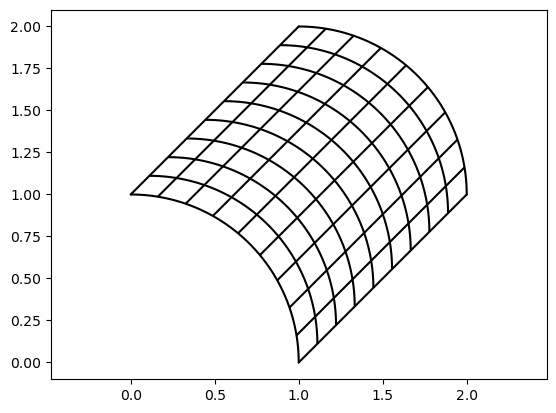

In [4]:
vis.plot_geo(geometry.outer_sum(f, g))
axis('equal');

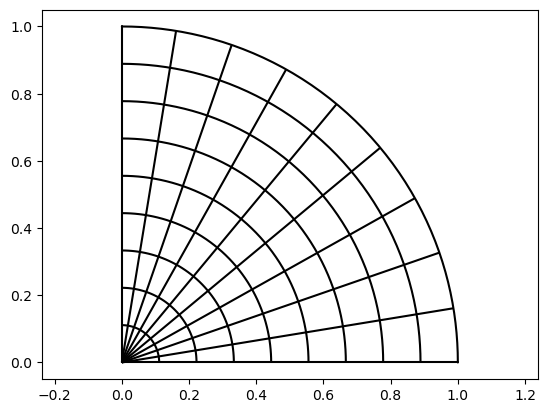

In [5]:
vis.plot_geo(geometry.outer_product(f, g))
axis('equal');

The last outer product has a singularity at the origin because multiplying with $g(0)=(0,0)$
forces all points into $(0,0)$. We can translate it first to avoid this, creating a
quarter annulus domain in the process:

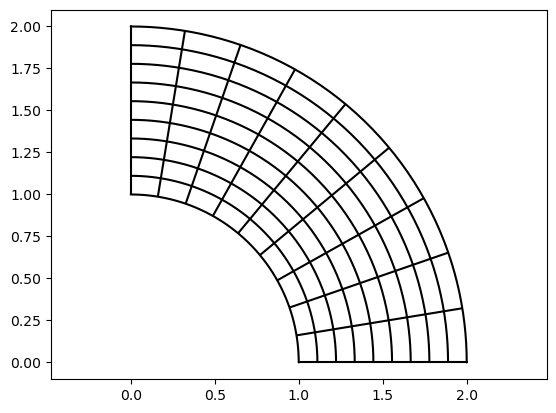

In [6]:
vis.plot_geo(geometry.outer_product(f, g.translate([1,1])))
axis('equal');

In this example, the second operand was a line segment from $(1,1)$ to $(2,2)$. Since numpy-style broadcasting
works for all these operations, we can also simply define the second operand as a linear scalar
function ranging from 1 to 2 to obtain the same effect:

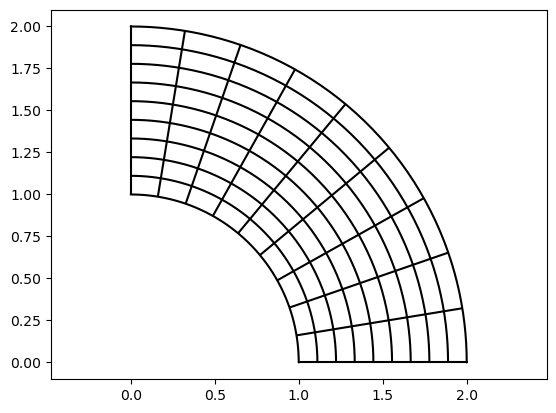

In [7]:
vis.plot_geo(geometry.outer_product(f, geometry.line_segment(1, 2)))
axis('equal');

We can also generate tensor product geometries; here each input function $f$ and $g$
has to be scalar such that the resulting output function $F$ is 2D-vector-valued, namely,
$$
    F(x,y) = (g(x), f(y)).
$$

However, you can also use this with higher-dimensional inputs, for instance to build a
3D cylinder on top of a 2D domain.

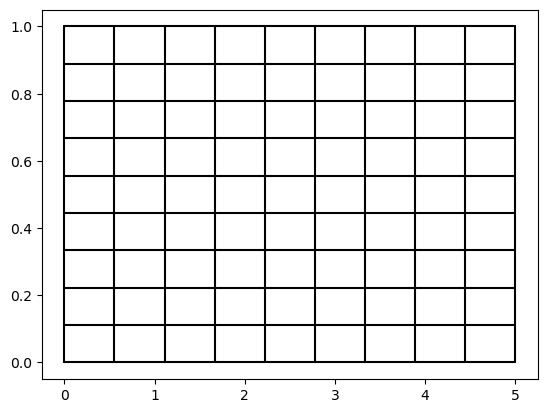

In [8]:
G = geometry.tensor_product(geometry.line_segment(0,1), geometry.line_segment(0,5, intervals=3))
vis.plot_geo(G)

We can also define geometries through user-defined functions, where we have to specify the
domain:

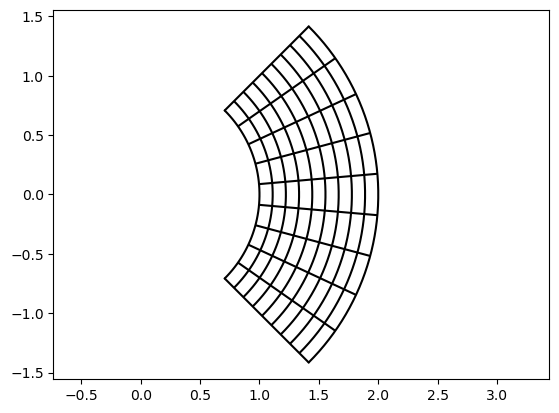

In [9]:
def f(x, y):
    r = 1 + x
    phi = (y - 0.5) * np.pi/2
    return (r * np.cos(phi), r * np.sin(phi))

f_func = geometry.UserFunction(f, [[0,1],[0,1]])
vis.plot_geo(f_func)
axis('equal');

Finally, a bit of fun with translated and rotated outer products of circular arcs:

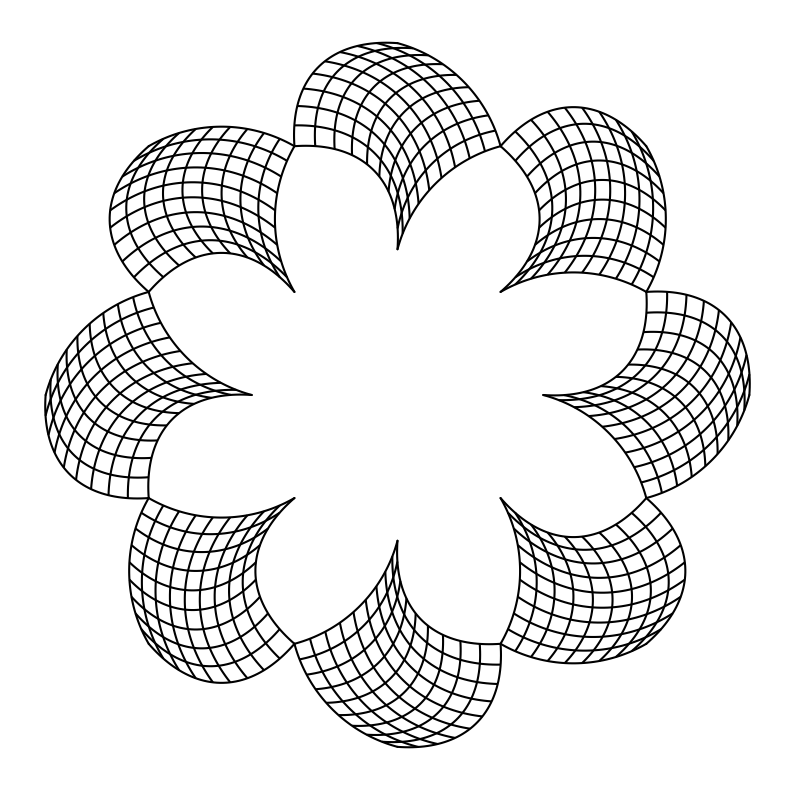

In [10]:
figsize(10,10)
G1 = geometry.circular_arc(pi/3).translate((-1,0)).rotate_2d(-pi/6)
G2 = G1.scale(-1).rotate_2d(pi/2)
G1 = G1.translate((1,1))
G2 = G2.translate((1,1))

G = geometry.outer_product(G1, G2).translate((-1,-2)).rotate_2d(3*pi/4).translate((0,1))

for i in range(8):
    vis.plot_geo(G.rotate_2d(i*pi/4))
axis('equal');
axis('off');